In [153]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

def init():
    dfs = pd.read_csv('data/Neuro279_Syn.csv', index_col=0)
    dfg = pd.read_csv('data/Neuro279_EJ.csv', index_col=0)
    return dfs, dfg

def traces(i):
    """Get traces of dataset @i"""
    return pd.read_csv('data/WBI%s.csv' % i, index_col=0)

LABS = ['AFDL', 'AIBL', 'AIBR', 'ALA', 'ALNL', 'ALNR', 'AS10', 'ASKL', 'ASKR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AWAR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'DA01', 'DA07', 'DA09', 'DB01', 'DB02', 'DB07', 'DVA', 'DVB', 'DVC', 'LUAL', 'LUAR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'PDA', 'PHAL', 'PHAR', 'PLML', 'PLMR', 'PVCL', 'PVCR', 'PVNL', 'PVNR', 'RIBL', 'RIBR', 'RID', 'RIFR', 'RIML', 'RIMR', 'RIS', 'RIVL', 'RIVR', 'RMED', 'RMEL', 'RMER', 'RMEV', 'SABD', 'SABVL', 'SABVR', 'SIADL', 'SIADR', 'SIAVL', 'SIAVR', 'SMDDL', 'SMDDR', 'SMDVL', 'SMDVR', 'URADR', 'URAVL', 'URAVR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'VA01', 'VA11', 'VA12', 'VB01', 'VB02', 'VB11', 'VD11', 'VD13']

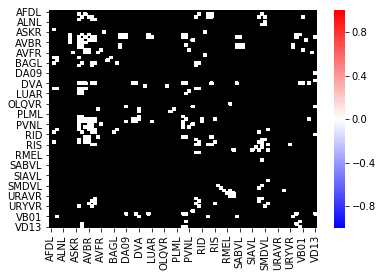

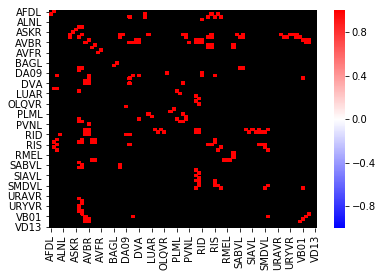

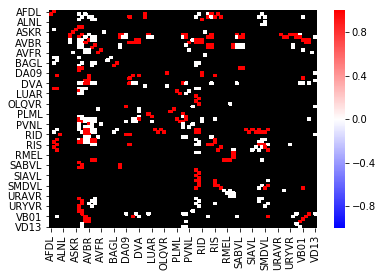

In [154]:
def nanify(df, val=0):
    df[df == 0] = np.nan
    df[df.notna()] = val
    return df
    
def plot_conns(df):
    g = sns.heatmap(df, cmap='bwr', vmin=-1, vmax=1)
    g.set_facecolor('k')
    plt.show()

dfs, dfg = init()
dfs = dfs.loc[LABS, LABS]
dfg = dfg.loc[LABS, LABS]
dfall = (dfs > 0) + 2*(dfg > 0) - 1
dfall[dfall == -1] = np.nan
dfall[dfall > 1] = 1
alles = dfall.copy()
syns = nanify(dfs)
dfsyn = syns.copy()
gaps = nanify(dfg, 1)
plot_conns(syns)
plot_conns(gaps)
plot_conns(alles)

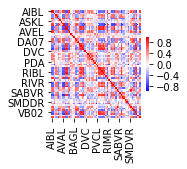

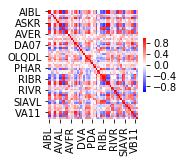

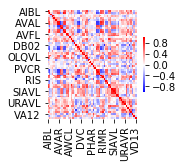

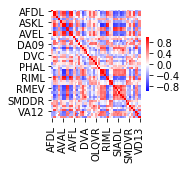

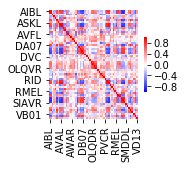

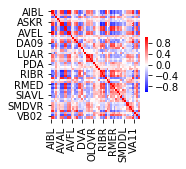

160


In [161]:
NB = 0

def add_val(i):
    nb = 0
    t0 = traces(i)
    labs0 = [n for n in t0.columns if any(c.isalpha() for c in n) and n not in ['bullshit', 'bullshit.1', 'PVCR.1', 'AS10.1', 'VD13.1']]
    corr0 = t0[labs0].corr()
    for i, n1 in enumerate(corr0.index):
        for n2 in corr0.index[i:]:
            if dfsyn.loc[n1,n2] == 0:
                nb += 1
                dfsyn.loc[n1,n2] = corr0.loc[n1,n2]         
                dfall.loc[n1,n2] = corr0.loc[n1,n2]  
            if dfsyn.loc[n2,n1] == 0:
                nb += 1
                dfsyn.loc[n2,n1] = corr0.loc[n2,n1]         
                dfall.loc[n2,n1] = corr0.loc[n2,n1]  
    plt.figure(figsize=(2,2))
    sns.heatmap(corr0, cmap='bwr', square=False, vmax=1, vmin=-1, cbar_kws={"shrink": .5})
    plt.show()
    return nb

for i in range(6):
    NB += add_val(i)
    
print(NB)

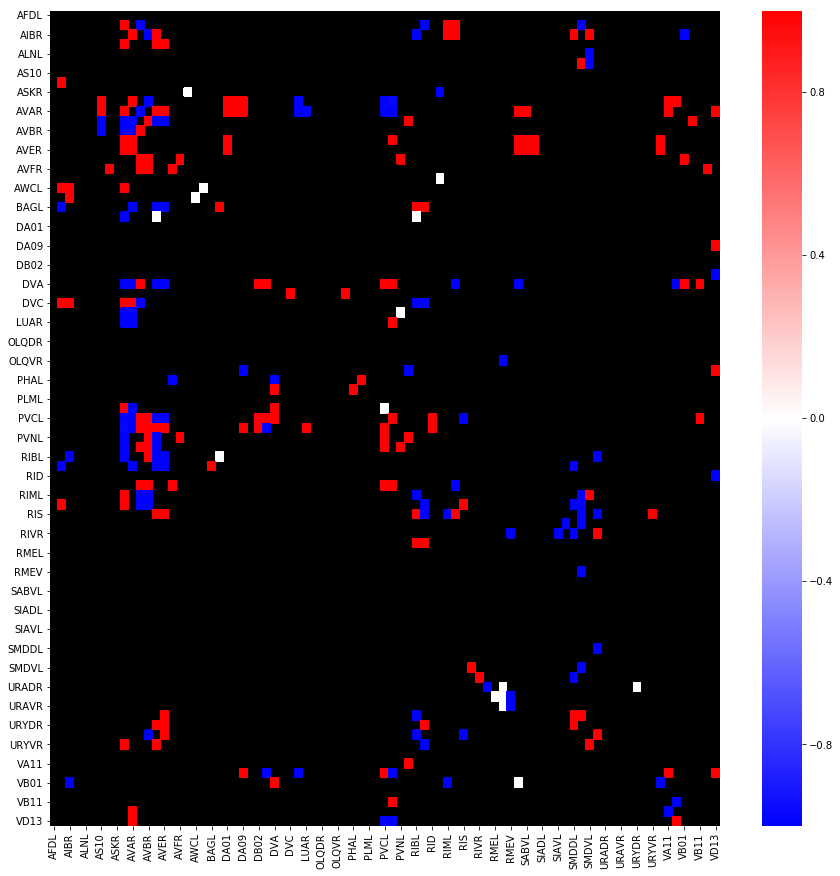

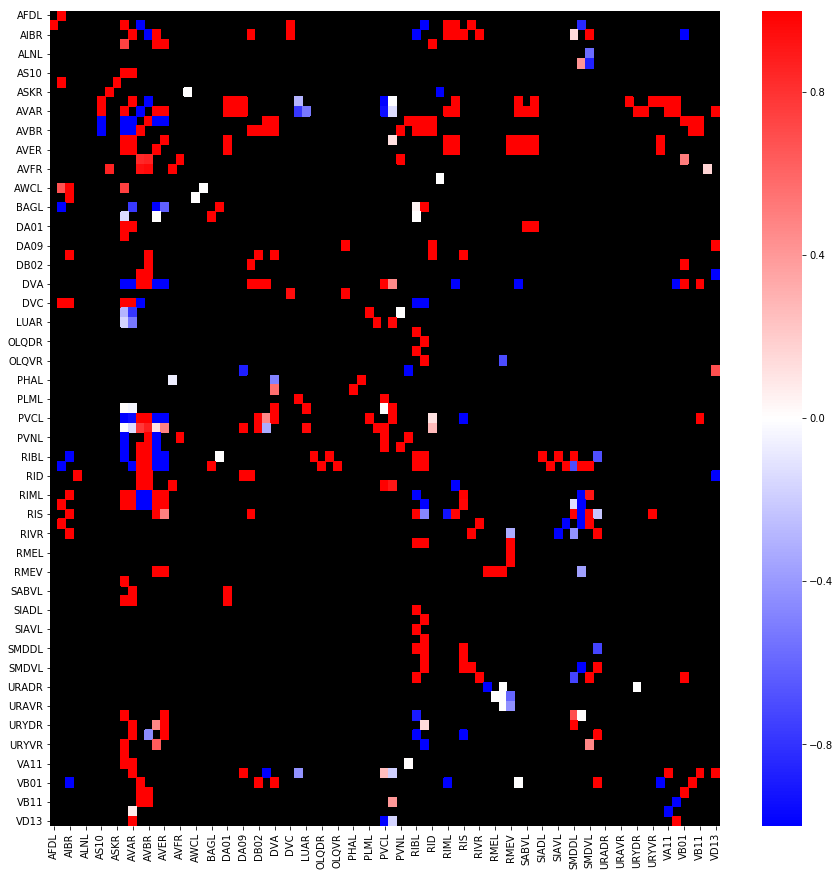

In [162]:
all_labs = dfall.index
# labs = [n for n in all_labs if ('DD' not in n) and ('VD' not in n) and ('DA' not in n) and ('VA' not in n) and ('DB' not in n) and ('VB' not in n) and ('AS' not in n) and ('VC' not in n)]
    
gtg = gaps.copy()
gtg[gtg.isna()] = 0
plt.figure(figsize=(15,15))
plot_conns((dfsyn - syns) * 500)
plt.figure(figsize=(15,15))
plot_conns(dfall * 5)

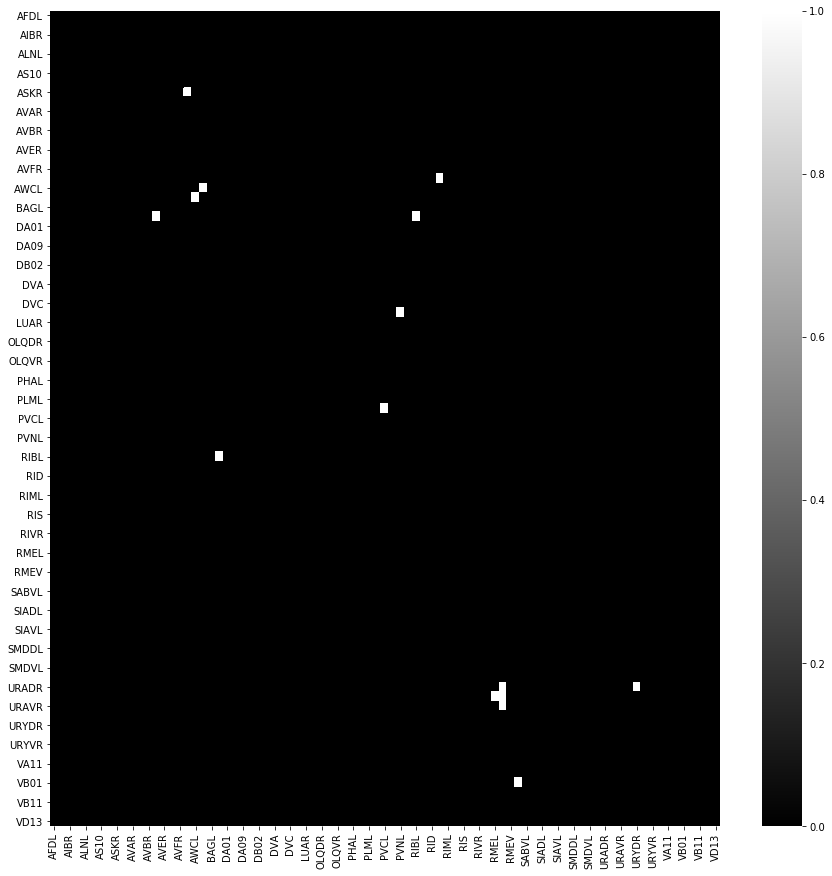

In [163]:
plt.figure(figsize=(15,15))
sns.heatmap(dfall ==0, cmap='binary_r')
plt.show()

In [165]:
print(np.sum(((dfsyn - syns).loc[labs,labs] > 0).sum()))
print(np.sum(((dfsyn - syns).loc[labs,labs] < 0).sum()))

51
34
